<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

In [75]:
# Installing the libraries with the specified version.
%pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.0.3 imbalanced-learn==0.10.1 -q

Note: you may need to restart the kernel to use updated packages.


## Importing necessary libraries

In [76]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score

import random

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [77]:
ds = pd.read_csv("../data/Churn.csv")

## Data Overview

### Check the first few rows of the dataset

In [78]:
# Read the first 5 rows
ds.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Check data types of the dataset

In [79]:
# Check the shape of dataset
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Out of 14 columns, only 3 columns are of string types. Rest are of type numbers.

### Check the shape of the dataset

In [80]:
# Check the shape of dataset
ds.shape

(10000, 14)

The given dataset has 10000 rows and 14 columns.

### Statistical summary of the dataset

In [81]:
# Print the statistical summary of the numerical columns
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


### Check missing values

In [82]:
# Print null values for each of the column
ds.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There are no missing values in any of the column.

### Check unique values in the dataset

In [83]:
# Check unique columns
ds.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

We observe that:
- `RowNumber` and `CustomerId` are unique.

Based on the number of unique columns, categorical values are:
- `Geography`
- `Gender`
-  `NumOfProducts`
- `HasCrCard`                       
- `IsActiveMember`
- `Exited`

### Drop unique columns

In [84]:
# RowNumber, CustomerID are unique. Hence dropping them.
# Also dropping Surname as it won't add contribute to target variable

ds = ds.drop(["RowNumber", 
              "CustomerId",
              "Surname"], 
              axis=1)

### Distinguish features and target variables
The features(X) are: 
CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary.  

The target variable(y) is:
Exited.

### Check the balance of target variable

In [85]:
# Check target variable class is balanced
ds["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

We observe that target variable is not balanced. 79.63% rows have class 0 (customers who didn't leave the bank) and 20.37% have class 1 (customers who exited or churned)

## Exploratory Data Analysis

### Univariate Analysis

In [86]:
# Taking inspiration from MLS notebooks
# Helper functions#1 
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [87]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on Credit Score


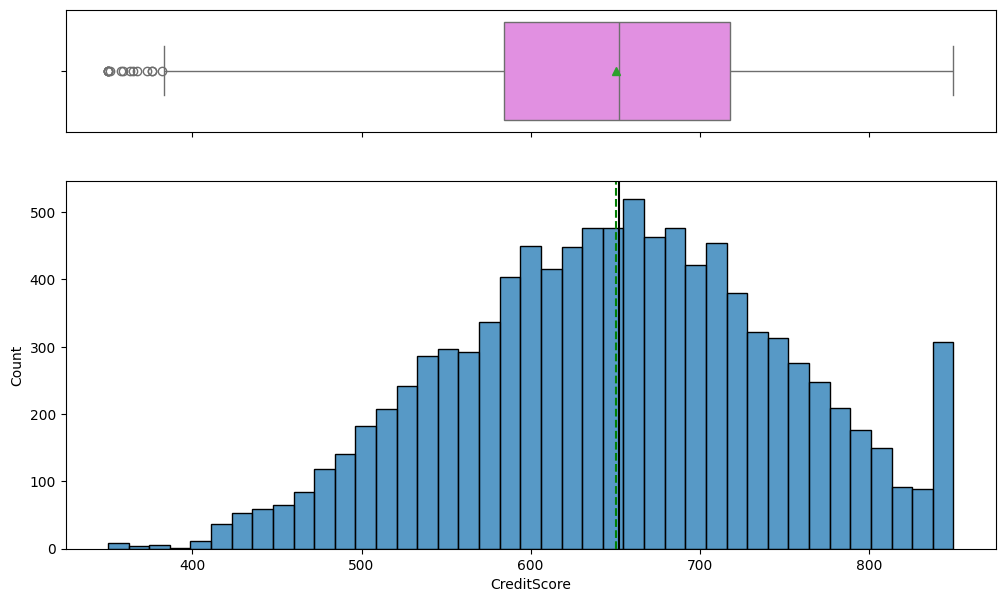

In [88]:
histogram_boxplot(ds,'CreditScore')

We observe that CreditScore is almost uniformly distributed. However there are outliers on the left side.

#### Observations on Age

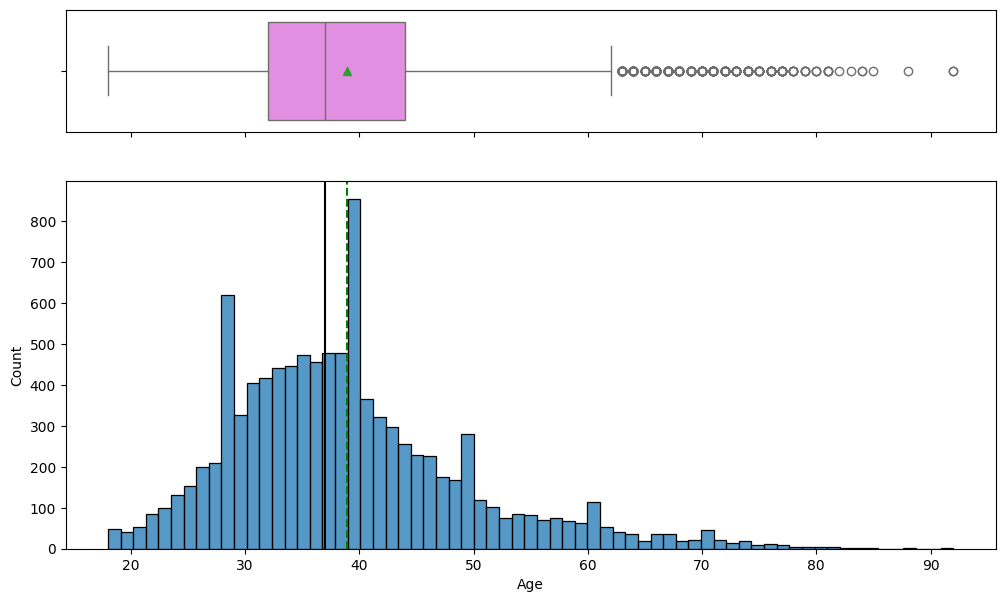

In [89]:
histogram_boxplot(ds,'Age')

We see that Age column has a number of outliers on the right side. We will run Outlier treatment before feeding the data to the model.

#### Observations on Estimated Salary

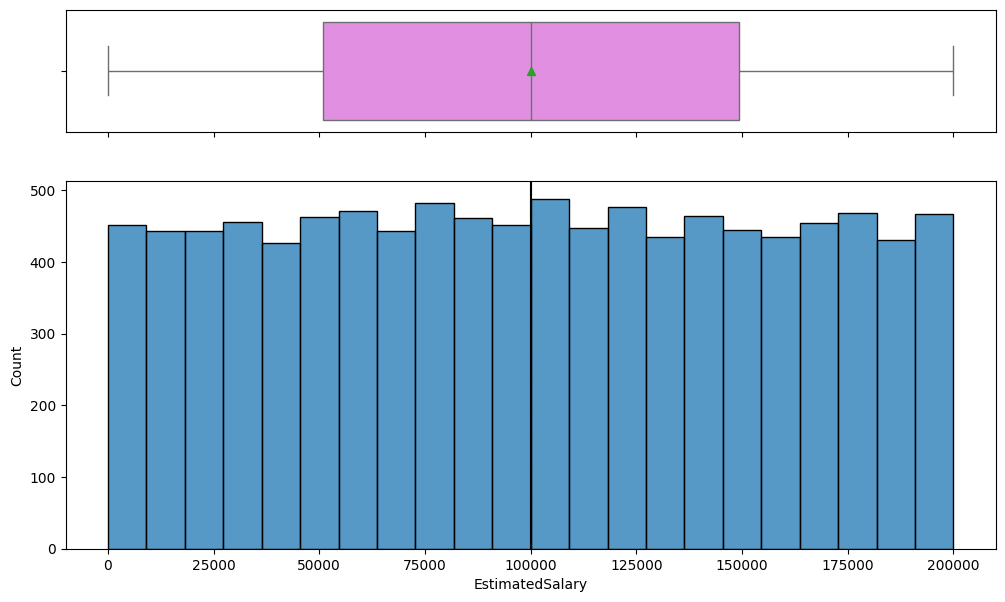

In [90]:
histogram_boxplot(ds,'EstimatedSalary')

We observe that Estimated Salary doesn't vary much. There are no outliers either side.

#### Observations on Balance

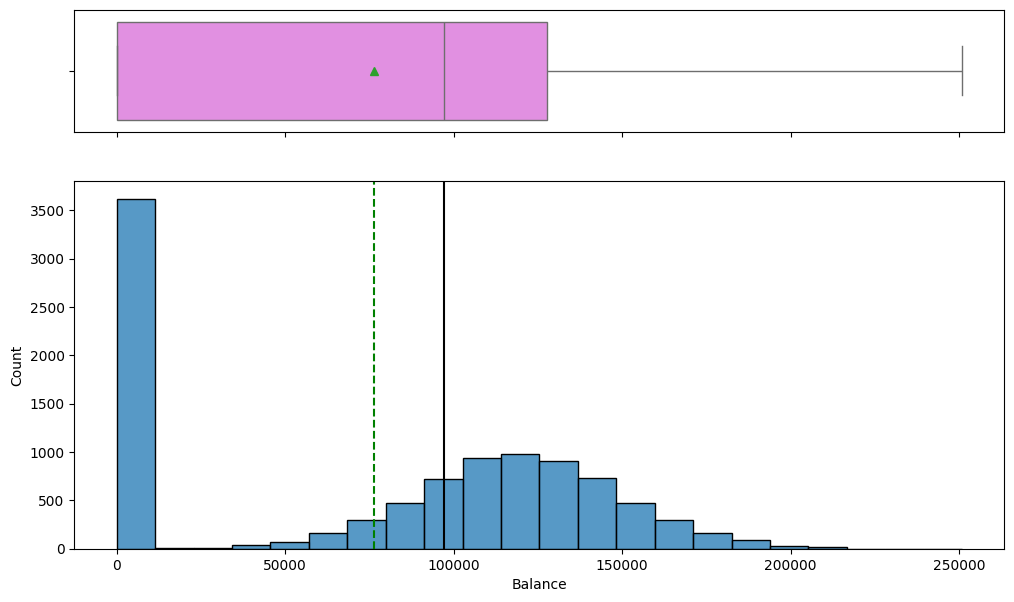

In [91]:
histogram_boxplot(ds,'Balance')

We observe that lot of customers have nil balance. 

#### Observations on Geography

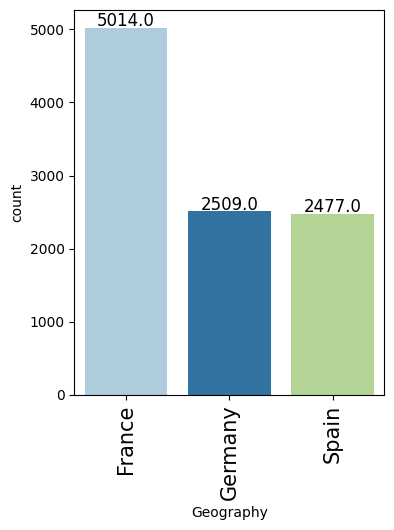

In [92]:
labeled_barplot(ds, "Geography")

We see that majority of the customers are located in France. Rest of the customers are equally distributed in Germany and Spain.

#### Observations on Exited (Target Variable)

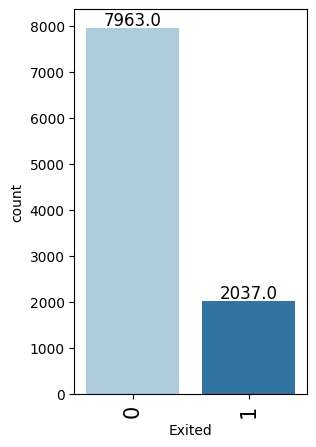

In [93]:
labeled_barplot(ds, "Exited")

We have already seen that dataset is imbalanced. Exited=1 class (customers who have left the bank) is under-represented. We would be using undersampling and oversampling techniques.

#### Observations on Gender 

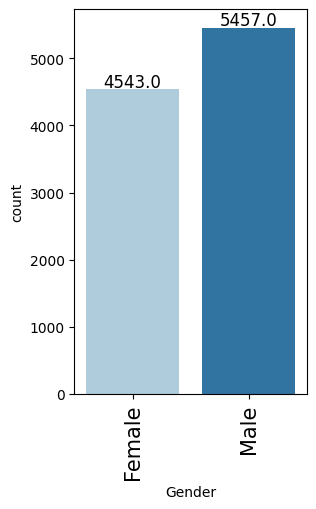

In [94]:
labeled_barplot(ds, "Gender")

The gender category looks nearly balanced.

#### Observations on Tenure

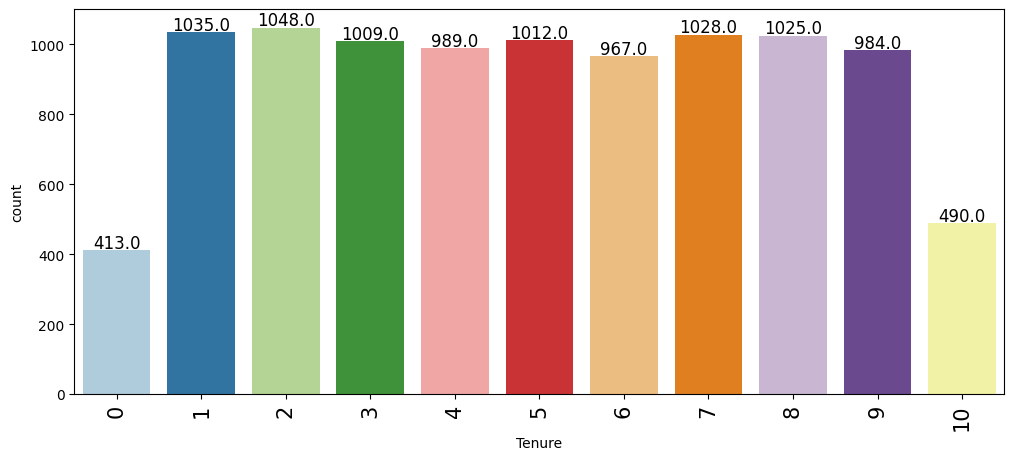

In [95]:
labeled_barplot(ds, "Tenure")

We observe that around 4% customers are new (customers with the bank for less than a year) and around 4.9% customers are with old (with the bank for 10 years).
Rest of the customers are with the bank for 1 to 10 years.

#### Observations on Number of Products

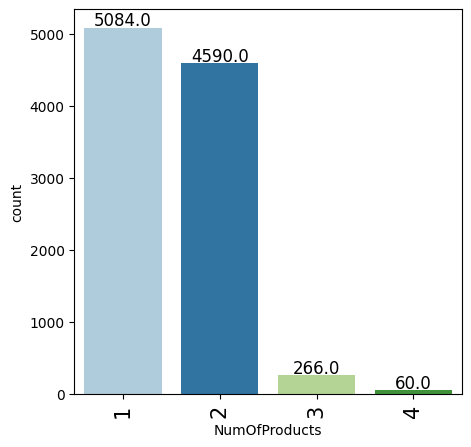

In [96]:
labeled_barplot(ds, "NumOfProducts")

There are very few customers that have 3 or 4 products with the bank.

Majority of the customers have only 1 product with the bank, followed by customers who have 2 products with the bank.

#### Observations on Has Credit Card

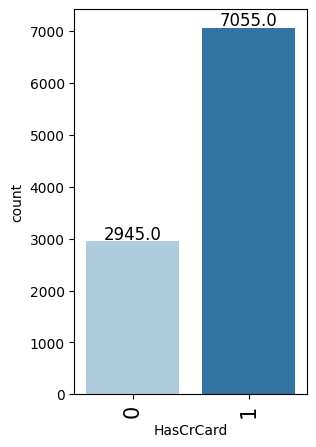

In [97]:
labeled_barplot(ds, "HasCrCard")

Majority of the customers have a credit card with the bank.

#### Observations on Is Active Member

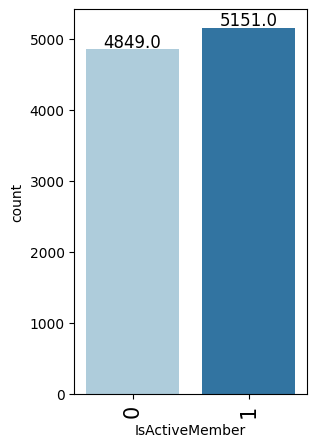

In [98]:
labeled_barplot(ds, "IsActiveMember")

The customers are almost evenly divided between those actively using the bank's products and those who are not.

### Bivariate Analysis

In [99]:
# Helper function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Correlation plot

In [100]:
# defining the list of numerical columns
cols_list = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]

#### Exited Vs Geography

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


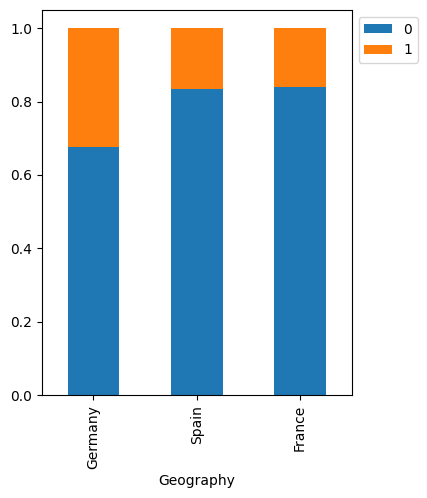

In [101]:
stacked_barplot(ds, "Geography", "Exited" )

We observe that most of the customers who have churned are from Germany, while the majority of the customers from France remain loyal.

#### Exited Vs Gender

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


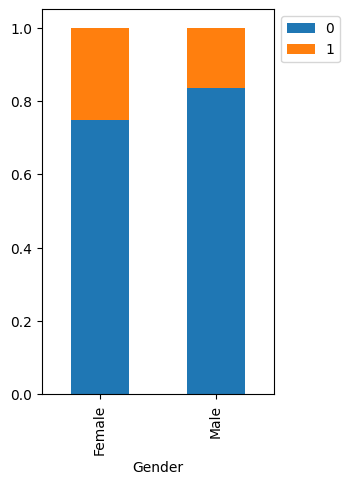

In [102]:
stacked_barplot(ds, "Gender", "Exited" )

We observe that, although the number of female customers is lower than that of male customers, a higher proportion of female customers have exited the bank compared to male customers.

#### Exited Vs Has Credit Card

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


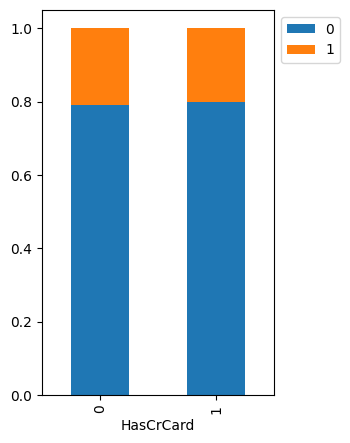

In [103]:
stacked_barplot(ds, "HasCrCard", "Exited" )

We observe that having a credit card with the bank does not impact customer retention, as the proportion of customers who have left the bank is the same for both those with and without credit cards.

#### Exited Vs Is active member

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


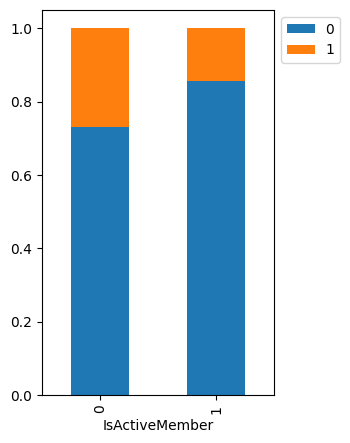

In [104]:
stacked_barplot(ds, "IsActiveMember", "Exited" )

We observe that inactive customers are more likely to leave the bank.

#### Exited Vs Credit Score

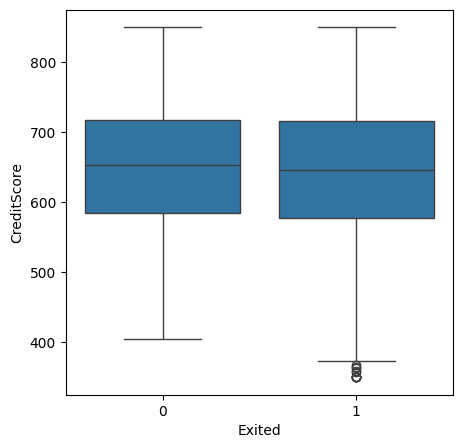

In [105]:
plt.figure(figsize=(5,5))
sns.boxplot(y='CreditScore',x='Exited',data=ds)
plt.show()

#### Exited Vs Age

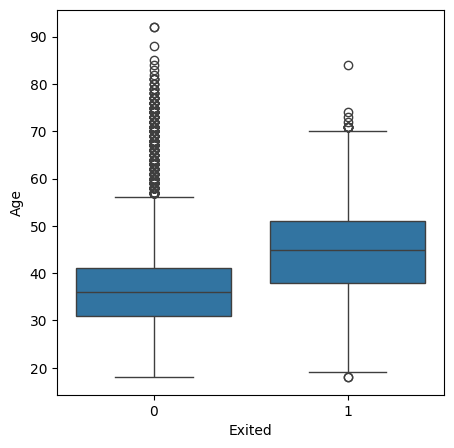

In [106]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Age',x='Exited',data=ds)
plt.show()

Majority of customers who have exited fall within the age group of 40 to 55 years.

#### Exited Vs Tenure

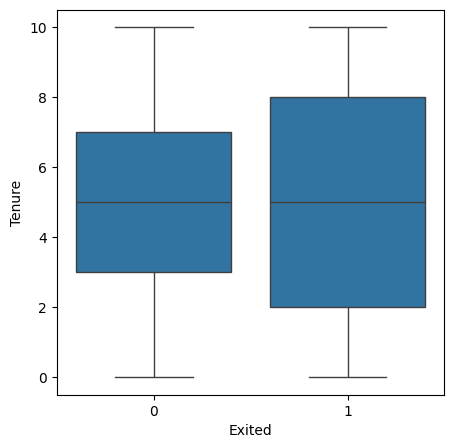

In [107]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Tenure',x='Exited',data=ds)
plt.show()

Majority of the customers who have left the bank are with the bank between 2 to 8 years.

#### Exited Vs Balance

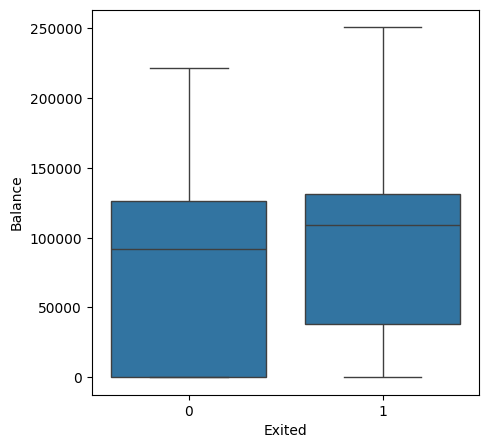

In [108]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Balance',x='Exited',data=ds)
plt.show()

Majority of the customers stay with the bank if account balance is less than 125,000. 

#### Exited Vs Number of Products

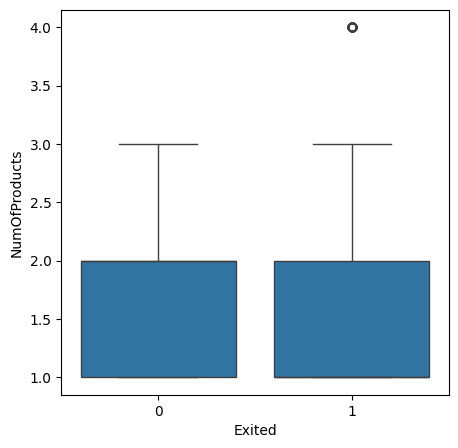

In [109]:
plt.figure(figsize=(5,5))
sns.boxplot(y='NumOfProducts',x='Exited',data=ds)
plt.show()

The number of products held with the bank appears to have no significant impact on whether customers decide to leave the bank.

#### Exited Vs Estimated Salary

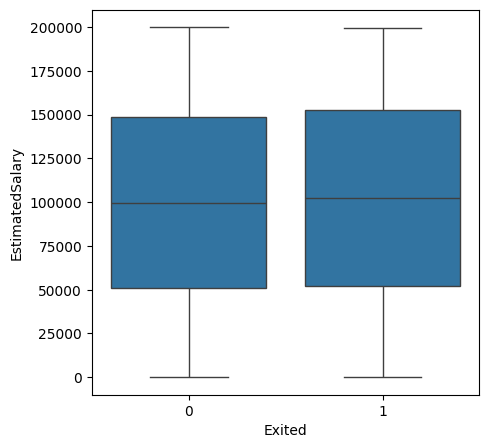

In [110]:
plt.figure(figsize=(5,5))
sns.boxplot(y='EstimatedSalary',x='Exited',data=ds)
plt.show()

The estimated salary of the customers appears to have no significant impact on whether they choose to leave or stay with the bank.

## Data Preprocessing

- Dummy variable creation
- Feature engg (if required)
- Outlier detection and treatment (if required)
- Preparing data for modelling
- Spliting dataset in train-validate-test

### Dummy Variable Creation for Geography and Gender features

There are 2 categorical variables in the dataset: geography and gender. They must be converted to numerical using One hot encoding.

In [111]:
ds = pd.get_dummies(ds,columns=ds.select_dtypes(include=["object"]).columns.tolist(),drop_first=True,dtype=float)

In [112]:
# Print ds to check one hot encoding is implemented and new columns can be seen
ds.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.0,0.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,0.0,0.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,0.0,0.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0,0.0


The Geography column has been split into Geography_Germany and Geography_Spain through one-hot encoding. Similarly, the Gender column has been converted into Gender_Male, where a value of 0 indicates the customer is female.

### Train-validation-test Split

In [113]:
X = ds.drop(['Exited'],axis=1) # Drop the target feature
y = ds['Exited'] # Exited

In [114]:
# Splitting the dataset into the Training and Testing set.

X_large, X_test, y_large, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,stratify=y,shuffle = True) 

In [115]:
# Splitting the dataset into the Training and Testing set.

X_train, X_val, y_train, y_val = train_test_split(X_large, y_large, test_size = 0.25, random_state = 42,stratify=y_large, shuffle = True) 

In [116]:
print(X_train.shape, X_val.shape, X_test.shape)

(6000, 11) (2000, 11) (2000, 11)


In [117]:
print(y_train.shape, y_val.shape, y_test.shape)

(6000,) (2000,) (2000,)


### Data Normalization

Since all the numerical values are on a different scale, so we will be scaling all the numerical values to bring them to the same scale.

In [118]:
# creating an instance of the standard scaler
sc = StandardScaler()

X_train[cols_list] = sc.fit_transform(X_train[cols_list])
X_val[cols_list] = sc.transform(X_val[cols_list])    ## Complete the code to specify the columns to normalize
X_test[cols_list] = sc.transform(X_test[cols_list])    ## Complete the code to specify the columns to normalize

## Model Building

### Model Evaluation Criterion

- We aim to **maximize Recall** because a higher Recall reduces the likelihood of false negatives.
- Minimizing false negatives is crucial because if the model incorrectly predicts that a customer won't churn when they actually will, it could result in a loss for the bank.


In [119]:
# Helper function to calculate confusion matrix

def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Let's create two blank dataframes that will store the recall values for all the models we build.

In [120]:
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

### Neural Network with SGD Optimizer

In [121]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [122]:
#Initializing the neural network
model_0 = Sequential()
# Adding the input layer with 64 neurons and relu as activation function
model_0.add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
# Adding 1st hidden layer with 32 neurons
model_0.add(Dense(32, activation='relu'))
# Adding the output layer
#There is only one output that will predict whether the customer will stay or exit
model_0.add(Dense(1, activation = 'sigmoid'))

In [123]:
# Use SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD(0.001)

# Choose Recall as the metric
metric = keras.metrics.Recall()

In [124]:
## Compile the code
model_0.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [125]:
# Model summary
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [126]:
# Fitting the model

history_0 = model_0.fit(
    X_train, y_train,
    batch_size=32,    ## Batch size= 32
    validation_data=(X_val,y_val),
    epochs=35,    ## Number of epochs=100
    verbose=1
)

Epoch 1/35


188/188 [==============================] - 2s 7ms/step - loss: 0.6151 - recall: 0.0720 - val_loss: 0.5833 - val_recall: 0.0000e+00
Epoch 2/35
188/188 [==============================] - 1s 5ms/step - loss: 0.5628 - recall: 0.0041 - val_loss: 0.5462 - val_recall: 0.0000e+00
Epoch 3/35
188/188 [==============================] - 1s 5ms/step - loss: 0.5341 - recall: 0.0000e+00 - val_loss: 0.5254 - val_recall: 0.0000e+00
Epoch 4/35
188/188 [==============================] - 1s 4ms/step - loss: 0.5176 - recall: 0.0000e+00 - val_loss: 0.5130 - val_recall: 0.0000e+00
Epoch 5/35
188/188 [==============================] - 1s 4ms/step - loss: 0.5074 - recall: 0.0000e+00 - val_loss: 0.5049 - val_recall: 0.0000e+00
Epoch 6/35
188/188 [==============================] - 1s 5ms/step - loss: 0.5004 - recall: 0.0000e+00 - val_loss: 0.4991 - val_recall: 0.0000e+00
Epoch 7/35
188/188 [==============================] - 1s 4ms/step - loss: 0.4952 - recall: 0.0000e+00 - val_loss: 0.4946 - val_recall: 0.0000e+

**Loss function**

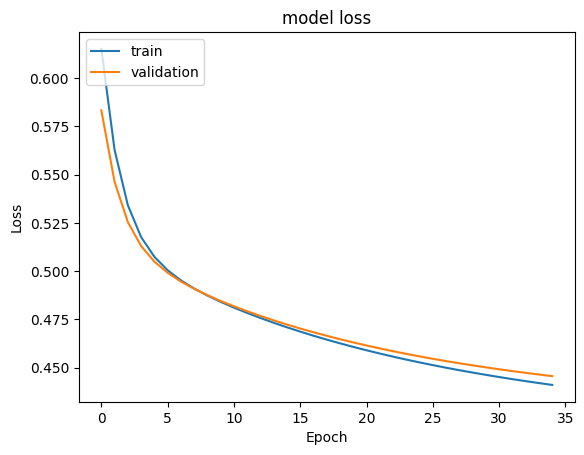

In [127]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_0.history['loss'])
plt.plot(history_0.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Recall**

In [128]:
#Predicting the results using best as a threshold
y_train_pred = model_0.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

188/188 [==============================] - 1s 3ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [129]:
#Predicting the results using best as a threshold
y_val_pred = model_0.predict(X_val)    
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [130]:
model_name = "NN with SGD"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

**Classification Report**

In [131]:
#lassification report
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.99      0.89      4777
           1       0.62      0.04      0.08      1223

    accuracy                           0.80      6000
   macro avg       0.71      0.52      0.49      6000
weighted avg       0.77      0.80      0.72      6000



In [132]:
#classification report
cr=classification_report(y_val, y_val_pred) 
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.99      0.89      1593
           1       0.61      0.05      0.10       407

    accuracy                           0.80      2000
   macro avg       0.71      0.52      0.49      2000
weighted avg       0.76      0.80      0.73      2000



**Confusion Matrix**

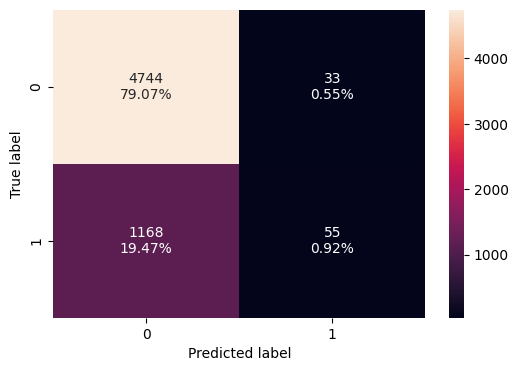

In [133]:
# Confusion matrix on training data
make_confusion_matrix(y_train, y_train_pred)

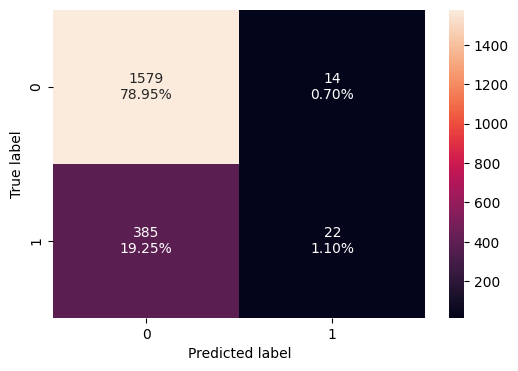

In [134]:
# Confusion matrix on validation data
make_confusion_matrix(y_val, y_val_pred)  

We see that recall value is very less and not acceptable.

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [135]:
backend.clear_session()
#Fixing the seed for random number generators to get same output
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [136]:
#Initializing the neural network
model_1 = Sequential()
# Add the input layer
model_1.add(Dense(16,
                  activation='relu',
                  input_dim = X_train.shape[1]))
#Add a hidden layer with 8 neurons
model_1.add(Dense(8,
                  activation='relu'))
# Add the output layer
model_1.add(Dense(1, activation = 'sigmoid'))

In [137]:
#Use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam(0.001)

#Select recall as the metric
metric = keras.metrics.Recall()


In [138]:
# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric
model_1.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=[metric])

In [139]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 337 (1.32 KB)
Trainable params: 337 (1.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [140]:
#Fitting the ANN
history_1 = model_1.fit(
    X_train,y_train,
    batch_size=32, ## Set batch size to 32
    validation_data=(X_val,y_val),
    epochs=35, ## Set epochs to 35
    verbose=1
)

Epoch 1/35


188/188 [==============================] - 2s 7ms/step - loss: 0.6215 - recall: 0.1962 - val_loss: 0.5074 - val_recall: 0.0000e+00
Epoch 2/35
188/188 [==============================] - 1s 5ms/step - loss: 0.4751 - recall: 0.0065 - val_loss: 0.4543 - val_recall: 0.0369
Epoch 3/35
188/188 [==============================] - 1s 5ms/step - loss: 0.4403 - recall: 0.1006 - val_loss: 0.4372 - val_recall: 0.1744
Epoch 4/35
188/188 [==============================] - 1s 4ms/step - loss: 0.4276 - recall: 0.1922 - val_loss: 0.4303 - val_recall: 0.2162
Epoch 5/35
188/188 [==============================] - 1s 3ms/step - loss: 0.4211 - recall: 0.2330 - val_loss: 0.4255 - val_recall: 0.2826
Epoch 6/35
188/188 [==============================] - 0s 2ms/step - loss: 0.4152 - recall: 0.2486 - val_loss: 0.4201 - val_recall: 0.2555
Epoch 7/35
188/188 [==============================] - 0s 2ms/step - loss: 0.4093 - recall: 0.2739 - val_loss: 0.4154 - val_recall: 0.2752
Epoch 8/35
188/188 [=====================

**Loss function**

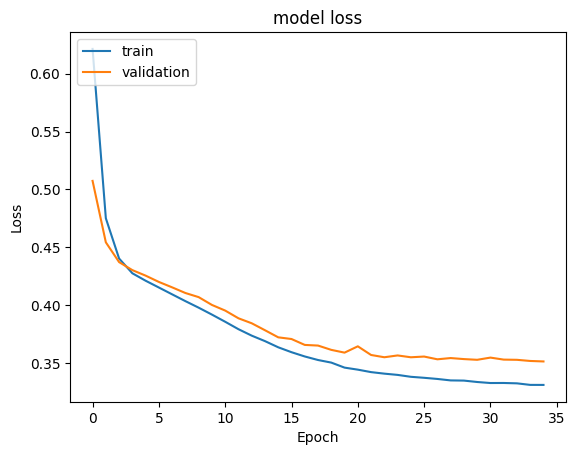

In [141]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Recall**

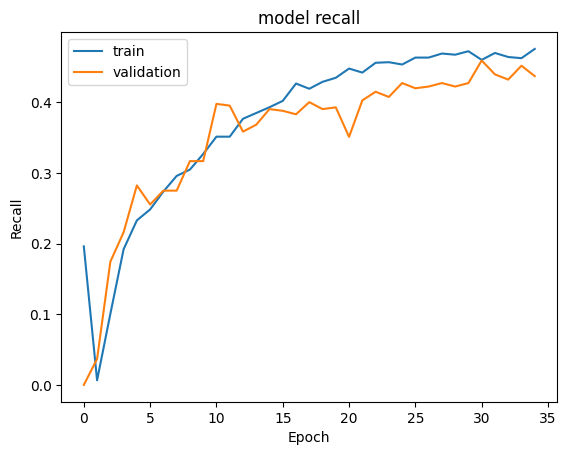

In [142]:
#Plotting Train recall vs Validation recall
plt.plot(history_1.history['recall'])
plt.plot(history_1.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [143]:
#Predicting the results using 0.5 as the threshold
y_train_pred = model_1.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

188/188 [==============================] - 0s 2ms/step


array([[False],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [144]:
#Predicting the results using 0.5 as the threshold
y_val_pred = model_1.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [145]:
model_name = "NN with Adam"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [146]:
#Classification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      4777
           1       0.75      0.48      0.59      1223

    accuracy                           0.86      6000
   macro avg       0.81      0.72      0.75      6000
weighted avg       0.85      0.86      0.85      6000



In [148]:
#classification report
cr=classification_report(y_val,y_val_pred)  ## model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1593
           1       0.74      0.44      0.55       407

    accuracy                           0.85      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000



**Confusion matrix**

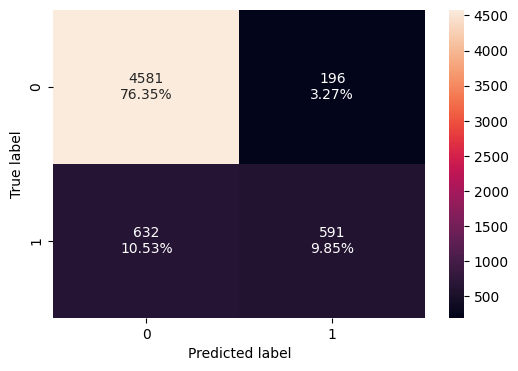

In [149]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

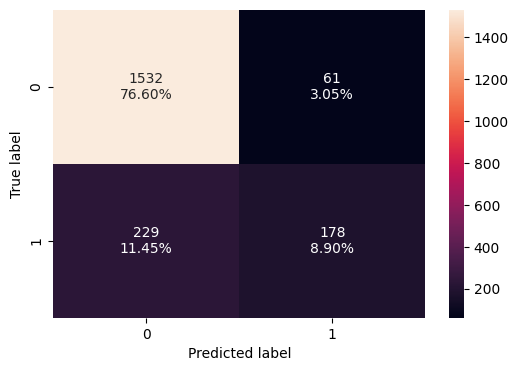

In [150]:
#Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred)  ## Model's performance on the validation set

We observe that model with Adam optimizer gave a weighter recall value of 0.86 on the training set and 0.85 on the validation set. This is better than the previous model.

### Neural Network with Adam Optimizer and Dropout

In [152]:
backend.clear_session()
#Fixing the seed for random number generators to get consistent output
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [153]:
#Initializing the neural network
model_2 = Sequential()
#Adding the input layer with 32 neurons and relu as activation function
model_2.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))
# Add dropout with ratio of 0.2 or any suitable value.
model_2.add(Dropout(0.2))
# Add a hidden layer with 8 neurons and relu activation function
model_2.add(Dense(8,activation='relu'))
# Add a hidden layer with 8 neurons and relu activation function
model_2.add(Dense(8,activation='relu'))
# add dropout with ratio of 0.1 
model_2.add(Dropout(0.1))
#Add a hidden layer 
model_2.add(Dense(4,activation='relu'))
# Complete the code to add the number of neurons required in the output layer.
model_2.add(Dense(1, activation = 'sigmoid'))

In [154]:
# Use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam(0.001)
# Select as the recall metric
metric = keras.metrics.Recall()


In [155]:
## Compile the model with binary cross entropy as loss function and recall as the metric.
model_2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [156]:
# Summary of the model
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 264       
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 1)                 5

In [158]:
#Fitting the ANN with batch_size = 32 and 100 epochs
history_2 = model_2.fit(
    X_train,y_train,
    batch_size=32,  ## Set Batch size as 32
    epochs=35, ## set epochs as 35
    verbose=1,
    validation_data=(X_val,y_val)
)

Epoch 1/35
188/188 [==============================] - 2s 4ms/step - loss: 0.4925 - recall: 0.0114 - val_loss: 0.4436 - val_recall: 0.0147
Epoch 2/35
188/188 [==============================] - 1s 3ms/step - loss: 0.4490 - recall: 0.0957 - val_loss: 0.4342 - val_recall: 0.0934
Epoch 3/35
188/188 [==============================] - 0s 3ms/step - loss: 0.4370 - recall: 0.1267 - val_loss: 0.4293 - val_recall: 0.1327
Epoch 4/35
188/188 [==============================] - 0s 2ms/step - loss: 0.4356 - recall: 0.1676 - val_loss: 0.4239 - val_recall: 0.2039
Epoch 5/35
188/188 [==============================] - 0s 2ms/step - loss: 0.4277 - recall: 0.2167 - val_loss: 0.4188 - val_recall: 0.2506
Epoch 6/35
188/188 [==============================] - 0s 2ms/step - loss: 0.4255 - recall: 0.2232 - val_loss: 0.4146 - val_recall: 0.3022
Epoch 7/35
188/188 [==============================] - 0s 2ms/step - loss: 0.4141 - recall: 0.2927 - val_loss: 0.4100 - val_recall: 0.2776
Epoch 8/35
188/188 [==============

**Loss function**

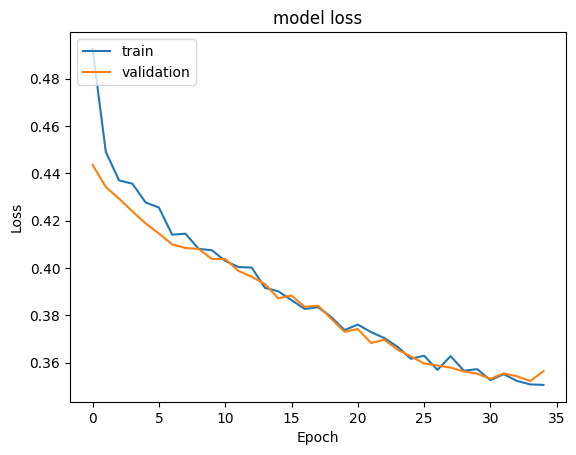

In [159]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we can observe that the train and validation curves are having smooth lines. Reducing the number of neurons and adding dropouts to the model worked, and the problem of overfitting was solved.

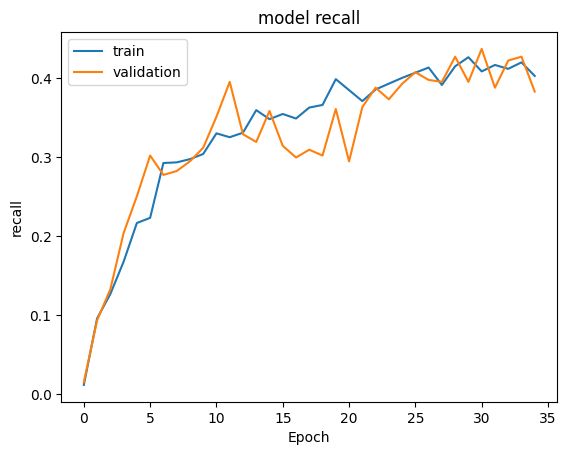

In [160]:
#Plotting Train recall vs Validation recall
plt.plot(history_2.history['recall'])
plt.plot(history_2.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [161]:
#Predicting the results using best as a threshold
y_train_pred = model_2.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

188/188 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

In [162]:
#Predicting the results using 0.5 as the threshold.
y_val_pred = model_2.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 [==============================] - 0s 3ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [163]:
model_name = "NN with Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [164]:
#classification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      4777
           1       0.84      0.43      0.57      1223

    accuracy                           0.87      6000
   macro avg       0.86      0.70      0.75      6000
weighted avg       0.86      0.87      0.85      6000



In [165]:
#classification report
cr = classification_report(y_val,y_val_pred) ## Model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1593
           1       0.79      0.38      0.52       407

    accuracy                           0.85      2000
   macro avg       0.82      0.68      0.71      2000
weighted avg       0.85      0.85      0.83      2000



**Confusion matrix**

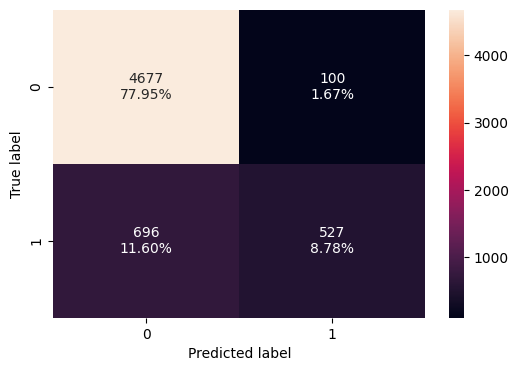

In [166]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

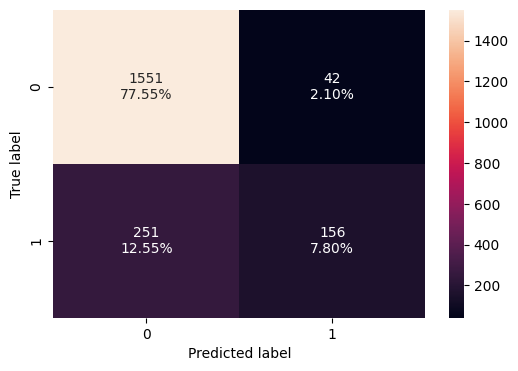

In [167]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)  ## Model's performance on the validation set

We observe that weighted recall value is 0.87 in the training data and 0.85 in the validation set.

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

**Let's try to apply SMOTE to balance this dataset and then again apply hyperparamter tuning accordingly.**

In [168]:
sm  = SMOTE(random_state=42)
#Fit SMOTE on the training data.
X_train_smote, y_train_smote= sm.fit_resample(X_train,y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

After UpSampling, the shape of train_X: (9554, 11)
After UpSampling, the shape of train_y: (9554,) 



Let's build a model with the balanced dataset

In [169]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [170]:
#Initializing the model
model_3 = Sequential()
# Add a input layer with 16 neurons and relu activation function
model_3.add(Dense(16,activation='relu',input_dim = X_train_smote.shape[1]))
# Add a hidden layer (specify the # of neurons and activation function)
model_3.add(Dense(8,activation='relu'))
# Add output layer with a sigmoid activation function.
model_3.add(Dense(1, activation = 'sigmoid'))

In [171]:
#Complete the code to use SGD as the optimizer.
optimizer = tf.keras.optimizers.Adam(0.001)

# Select Recall metric
metric = keras.metrics.Recall()


In [172]:
# Compile the model with binary cross entropy as loss function and recall as the metric
model_3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [173]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 337 (1.32 KB)
Trainable params: 337 (1.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [174]:
#Fitting the ANN
history_3 = model_3.fit(
    X_train_smote, y_train_smote,
    batch_size=32, 
    epochs=35,
    verbose=1,
    validation_data = (X_val,y_val)
)

Epoch 1/35
299/299 [==============================] - 1s 3ms/step - loss: 0.6526 - recall: 0.7773 - val_loss: 0.6399 - val_recall: 0.6781
Epoch 2/35
299/299 [==============================] - 1s 2ms/step - loss: 0.5612 - recall: 0.7044 - val_loss: 0.5869 - val_recall: 0.6732
Epoch 3/35
299/299 [==============================] - 1s 2ms/step - loss: 0.5362 - recall: 0.7189 - val_loss: 0.5534 - val_recall: 0.6560
Epoch 4/35
299/299 [==============================] - 1s 2ms/step - loss: 0.5205 - recall: 0.7268 - val_loss: 0.5499 - val_recall: 0.6732
Epoch 5/35
299/299 [==============================] - 1s 2ms/step - loss: 0.5089 - recall: 0.7373 - val_loss: 0.5359 - val_recall: 0.6609
Epoch 6/35
299/299 [==============================] - 1s 2ms/step - loss: 0.4987 - recall: 0.7509 - val_loss: 0.5383 - val_recall: 0.6732
Epoch 7/35
299/299 [==============================] - 1s 2ms/step - loss: 0.4907 - recall: 0.7628 - val_loss: 0.5200 - val_recall: 0.6732
Epoch 8/35
299/299 [==============

**Loss function**

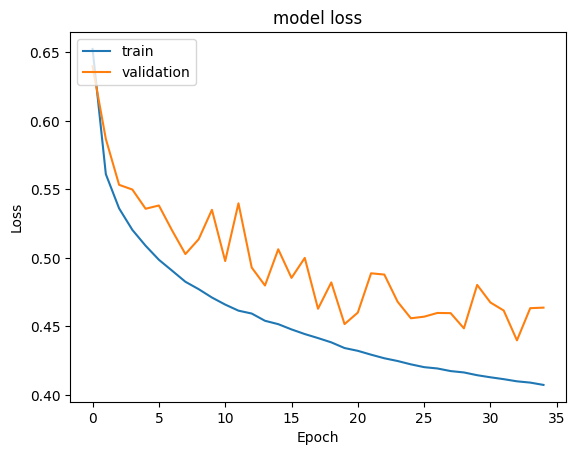

In [175]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

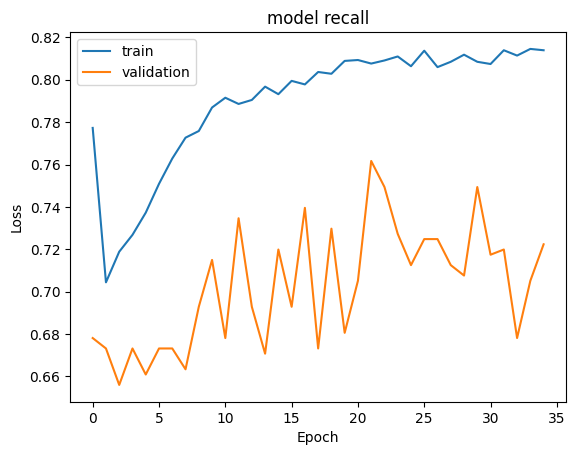

In [176]:
#Plotting Train recall vs Validation recall
plt.plot(history_3.history['recall'])
plt.plot(history_3.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [177]:
y_train_pred = model_3.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

299/299 [==============================] - 1s 2ms/step


array([[False],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [178]:
y_val_pred = model_3.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [179]:
model_name = "NN with SMOTE & SGD"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [180]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      4777
           1       0.81      0.82      0.82      4777

    accuracy                           0.82      9554
   macro avg       0.82      0.82      0.82      9554
weighted avg       0.82      0.82      0.82      9554



In [181]:
cr=classification_report(y_val,y_val_pred) ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1593
           1       0.47      0.72      0.57       407

    accuracy                           0.78      2000
   macro avg       0.69      0.76      0.71      2000
weighted avg       0.83      0.78      0.79      2000



**Confusion Matrix**

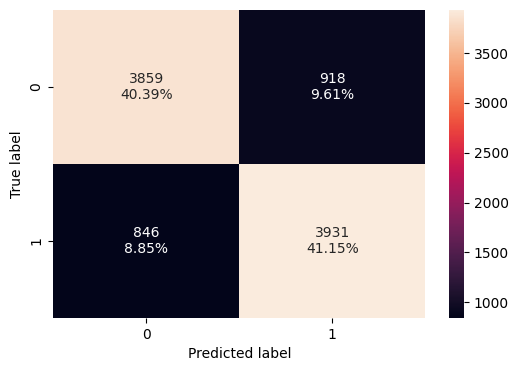

In [182]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

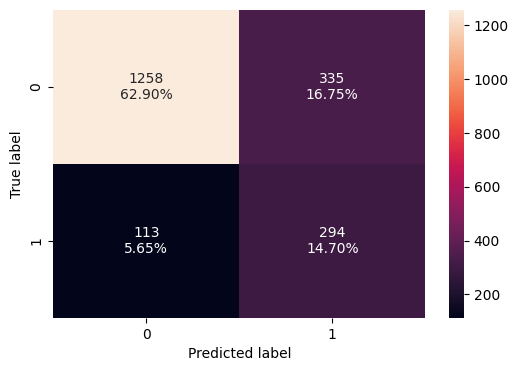

In [183]:
#Calculating the confusion matrix

make_confusion_matrix(y_val,y_val_pred) #model's performance on the validation set

We observe that weighted recall of training data is 0.82 in the training data set and 0.78 in the validation dataset.

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

Let's build a model with the balanced dataset

In [184]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [185]:
#Initializing the model
model_4 = Sequential()
#Add a input layer
model_4.add(Dense(16,activation='relu',input_dim = X_train_smote.shape[1]))
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_4.add(Dense(8,activation='relu'))
# add the required number of neurons in the output layer and a suitable activation function.
model_4.add(Dense(1, activation = 'sigmoid'))

In [186]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 337 (1.32 KB)
Trainable params: 337 (1.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [187]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam(0.001)

# Define the metric to be used
metric = keras.metrics.Recall()

In [188]:
# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric
model_4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [189]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 337 (1.32 KB)
Trainable params: 337 (1.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [190]:
#Fitting the ANN

history_4 = model_4.fit(
    X_train_smote,y_train_smote,
    batch_size=32, 
    epochs=35, 
    verbose=1,
    validation_data = (X_val,y_val)
)

Epoch 1/35
299/299 [==============================] - 2s 2ms/step - loss: 0.6526 - recall: 0.7773 - val_loss: 0.6399 - val_recall: 0.6781
Epoch 2/35
299/299 [==============================] - 1s 2ms/step - loss: 0.5612 - recall: 0.7044 - val_loss: 0.5869 - val_recall: 0.6732
Epoch 3/35
299/299 [==============================] - 1s 2ms/step - loss: 0.5362 - recall: 0.7189 - val_loss: 0.5534 - val_recall: 0.6560
Epoch 4/35
299/299 [==============================] - 0s 2ms/step - loss: 0.5205 - recall: 0.7268 - val_loss: 0.5499 - val_recall: 0.6732
Epoch 5/35
299/299 [==============================] - 0s 2ms/step - loss: 0.5089 - recall: 0.7373 - val_loss: 0.5359 - val_recall: 0.6609
Epoch 6/35
299/299 [==============================] - 0s 2ms/step - loss: 0.4987 - recall: 0.7509 - val_loss: 0.5383 - val_recall: 0.6732
Epoch 7/35
299/299 [==============================] - 0s 2ms/step - loss: 0.4907 - recall: 0.7628 - val_loss: 0.5200 - val_recall: 0.6732
Epoch 8/35
299/299 [==============

**Loss function**

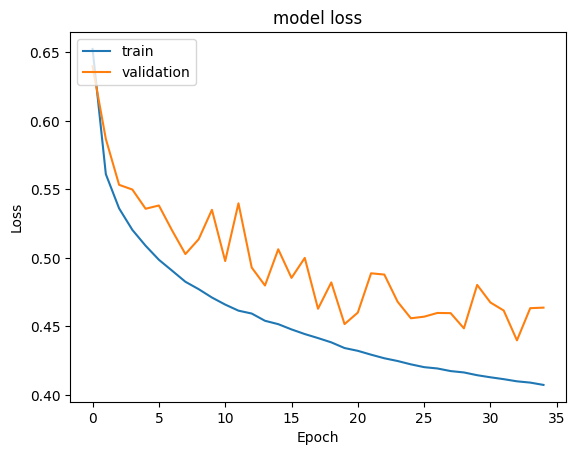

In [191]:

#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

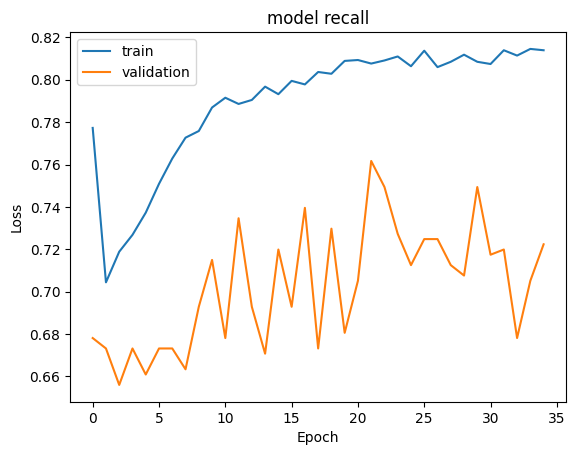

In [192]:
#Plotting Train recall vs Validation recall
plt.plot(history_4.history['recall'])
plt.plot(history_4.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [193]:
y_train_pred = model_4.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

299/299 [==============================] - 1s 2ms/step


array([[False],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [194]:
y_val_pred = model_4.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [195]:
model_name = "NN with SMOTE & Adam"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [196]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      4777
           1       0.81      0.82      0.82      4777

    accuracy                           0.82      9554
   macro avg       0.82      0.82      0.82      9554
weighted avg       0.82      0.82      0.82      9554



In [197]:
cr=classification_report(y_val,y_val_pred) ## check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1593
           1       0.47      0.72      0.57       407

    accuracy                           0.78      2000
   macro avg       0.69      0.76      0.71      2000
weighted avg       0.83      0.78      0.79      2000



**Confusion matrix**

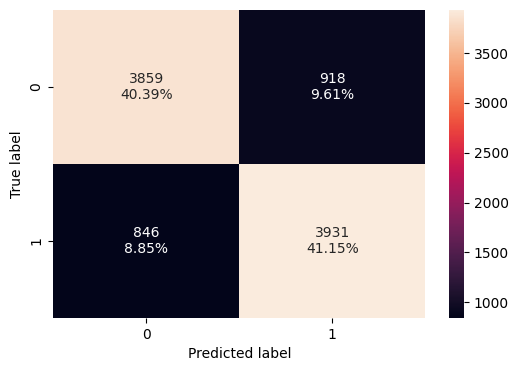

In [198]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

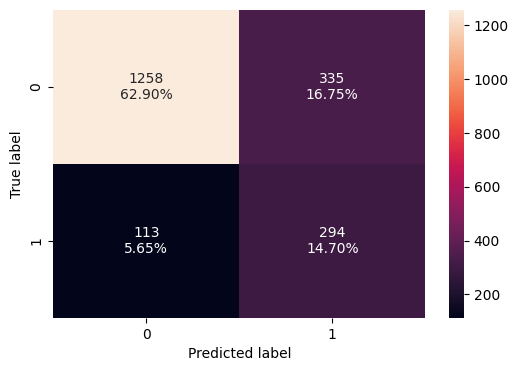

In [201]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)  ## check the model's performance on the validation set

We observe that the weighted recall value has gone down for both training and validation data.

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [200]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [202]:
#Initializing the model
model_5 = Sequential()
# add input layer with relu as activation function
model_5.add(Dense(32,activation='relu',input_dim = X_train_smote.shape[1]))
#Complete the code to add dropout rate
model_5.add(Dropout(0.2))
# Add a hidden layer with 8 neurons and relu activation function
model_5.add(Dense(8,activation='relu'))
# Add drop out ratio of 1.0
model_5.add(Dropout(0.1))
# Add a hidden layer with 8 neurons and relu activation function
model_5.add(Dense(8,activation='relu'))
# Add output layer
model_5.add(Dense(1, activation = 'sigmoid'))

In [203]:
#Use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam(0.001)

#  define the metric to be used
metric = keras.metrics.Recall()

In [204]:
# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric
model_5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [205]:
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 264       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 729 (2.85 KB)
Trainable params: 729 (2.85 

In [206]:
history_5 = model_5.fit(
    X_train_smote,y_train_smote,
    batch_size=32,
    epochs=35,
    verbose=1,
    validation_data = (X_val,y_val))

Epoch 1/35
299/299 [==============================] - 2s 2ms/step - loss: 0.6262 - recall: 0.7042 - val_loss: 0.5854 - val_recall: 0.6683
Epoch 2/35
299/299 [==============================] - 1s 2ms/step - loss: 0.5641 - recall: 0.7138 - val_loss: 0.5702 - val_recall: 0.6830
Epoch 3/35
299/299 [==============================] - 1s 2ms/step - loss: 0.5457 - recall: 0.7333 - val_loss: 0.5250 - val_recall: 0.6486
Epoch 4/35
299/299 [==============================] - 1s 2ms/step - loss: 0.5331 - recall: 0.7297 - val_loss: 0.5268 - val_recall: 0.6339
Epoch 5/35
299/299 [==============================] - 1s 2ms/step - loss: 0.5266 - recall: 0.7316 - val_loss: 0.5412 - val_recall: 0.6486
Epoch 6/35
299/299 [==============================] - 1s 2ms/step - loss: 0.5180 - recall: 0.7381 - val_loss: 0.5246 - val_recall: 0.6314
Epoch 7/35
299/299 [==============================] - 1s 2ms/step - loss: 0.5134 - recall: 0.7385 - val_loss: 0.5120 - val_recall: 0.6192
Epoch 8/35
299/299 [==============

**Loss function**

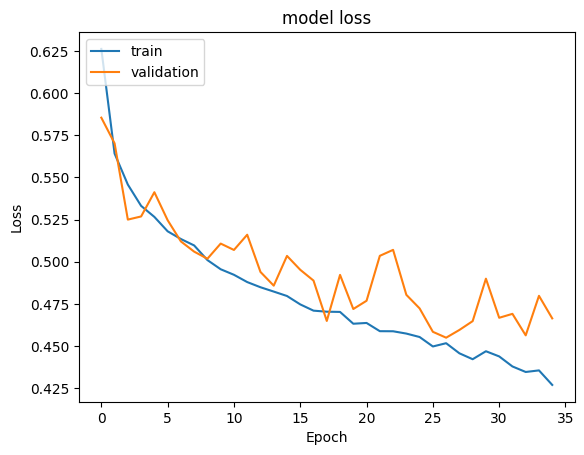

In [207]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

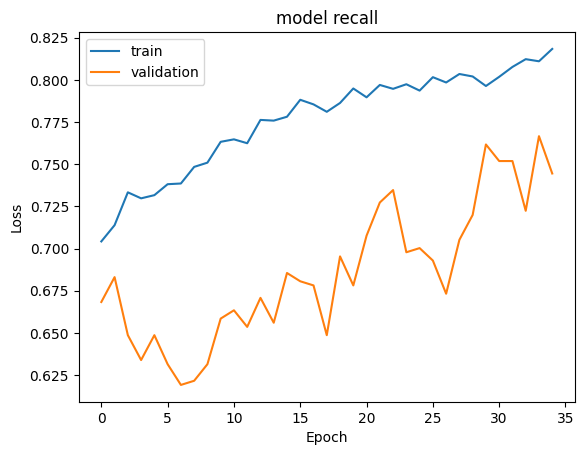

In [208]:
#Plotting Train recall vs Validation recall
plt.plot(history_5.history['recall'])
plt.plot(history_5.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [209]:
y_train_pred = model_5.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

299/299 [==============================] - 0s 1ms/step


array([[False],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [210]:
y_val_pred = model_5.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [211]:
model_name = "NN with SMOTE,Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [212]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4777
           1       0.81      0.84      0.83      4777

    accuracy                           0.82      9554
   macro avg       0.82      0.82      0.82      9554
weighted avg       0.82      0.82      0.82      9554



In [213]:
#classification report
cr=classification_report(y_val,y_val_pred)  ## check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1593
           1       0.48      0.74      0.58       407

    accuracy                           0.78      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.83      0.78      0.80      2000



**Confusion matrix**

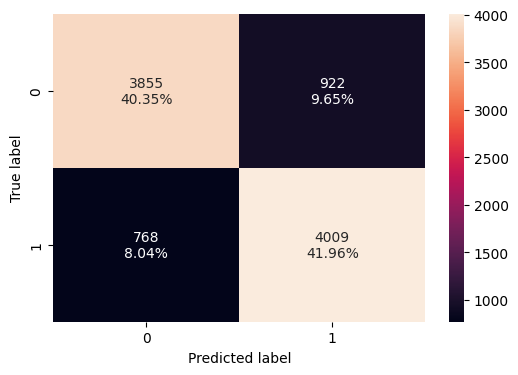

In [214]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

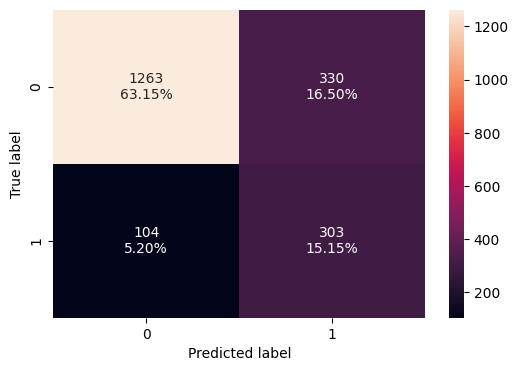

In [215]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)  ##  check the model's performance on the validation set

## Model Performance Comparison and Final Model Selection

In [216]:
print("Training performance comparison")
train_metric_df

Training performance comparison


,recall
NN with SGD,0.044971
NN with Adam,0.483238
NN with Adam & Dropout,0.430908
NN with SMOTE & SGD,0.822901
NN with SMOTE & Adam,0.822901
"NN with SMOTE,Adam & Dropout",0.839230


In [217]:
print("Validation set performance comparison")
valid_metric_df

Validation set performance comparison


,recall
NN with SGD,0.054054
NN with Adam,0.437346
NN with Adam & Dropout,0.383292
NN with SMOTE & SGD,0.722359
NN with SMOTE & Adam,0.722359
"NN with SMOTE,Adam & Dropout",0.744472


In [218]:
train_metric_df - valid_metric_df

,recall
NN with SGD,-0.009083
NN with Adam,0.045892
NN with Adam & Dropout,0.047615
NN with SMOTE & SGD,0.100543
NN with SMOTE & Adam,0.100543
"NN with SMOTE,Adam & Dropout",0.094758


Based on the recall value for different models above, the best model is **with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout** (model5)

In [219]:
y_test_pred = model_5.predict(X_test)    ## Specify the best model
y_test_pred = (y_test_pred > 0.5)
print(y_test_pred)

63/63 [==============================] - 0s 2ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


In [220]:
#lets print classification report
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.77      0.84      1593
           1       0.45      0.75      0.57       407

    accuracy                           0.77      2000
   macro avg       0.69      0.76      0.70      2000
weighted avg       0.83      0.77      0.78      2000



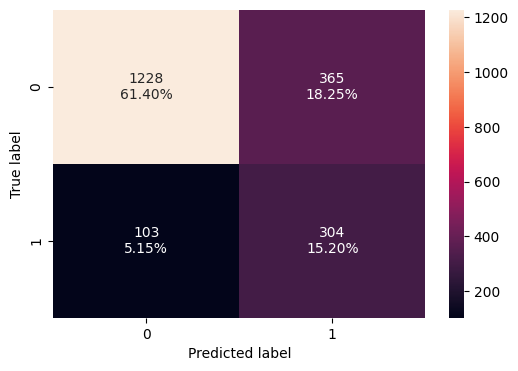

In [221]:
#Calculating the confusion matrix
make_confusion_matrix(y_test,y_test_pred)

## Actionable Insights and Business Recommendations


- The older customers are exiting at a higher rate than younger ones, indicating a possible difference in service preferences across age groups. The bank may need to reassess its target market or develop different retention strategies for older age categories.

- The proportion of female customers churning is also higher than that of male customers. Interestingly, most of the exited customers have credit cards. Since the majority of customers possess credit cards, this could be a coincidence.

- As expected, inactive members have a higher exit rate. However, the overall proportion of inactive members is quite high, suggesting the need for a program to convert this group into active customers, which would positively affect customer exit.

- Regarding tenure, clients at both extremes—those who have been with the bank for a short time and those with a long tenure are more likely to exit compared to those with average tenure. It is concerning that the bank is losing customers with significant balances, which could impact its available capital for lending.